# Symbol Tuning Data Preparation

## Environment Setup

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00


In [15]:
from datasets import load_dataset
from datasets import DatasetDict
import pandas as pd
from datasets import Dataset
from huggingface_hub import create_repo
import random

In [3]:
from huggingface_hub import notebook_login

notebook_login()

## Data Creation

In [101]:
data = load_dataset("tasksource/icl-symbol-tuning-instruct")

In [102]:
data

DatasetDict({
    train: Dataset({
        features: ['task', 'inputs', 'targets', 'symbols'],
        num_rows: 452367
    })
    validation: Dataset({
        features: ['task', 'inputs', 'targets', 'symbols'],
        num_rows: 14970
    })
    test: Dataset({
        features: ['task', 'inputs', 'targets', 'symbols'],
        num_rows: 16204
    })
})

In [103]:
# Filter out data points where the first word of 'task' is 'tweet_eval' (Because used in evaluation)
def filter_tweet_eval(example):
    first_word = example['task'].split("/")[0]
    return first_word != "tweet_eval" and first_word != "tweets_hate_speech_detection" and first_word != "subjectivity" and first_word != "hate_speech18"

# Apply the filter function to each split of the dataset
filtered_train = data['train'].filter(filter_tweet_eval)
filtered_validation = data['validation'].filter(filter_tweet_eval)
filtered_test = data['test'].filter(filter_tweet_eval)

# Create a new DatasetDict containing the subsets
data = DatasetDict({
    'train': filtered_train,
    'validation': filtered_validation,
    'test': filtered_test
})

# Print the number of remaining rows after filtering
print("Number of remaining rows after filtering:")
print("Train:", len(filtered_train))
print("Validation:", len(filtered_validation))
print("Test:", len(filtered_test))


# Select 100,000 data points from the training set
train_subset = data['train'].select(range(100000))

# Select 10,000 data points from the validation set
validation_subset = data['validation'].select(range(10000))

# Create a new DatasetDict containing the subsets
new_dataset = DatasetDict({
    'train': train_subset,
    'validation': validation_subset
})

Filter:   0%|          | 0/452367 [00:00<?, ? examples/s]

Filter:   0%|          | 0/14970 [00:00<?, ? examples/s]

Filter:   0%|          | 0/16204 [00:00<?, ? examples/s]

Number of remaining rows after filtering:
Train: 438541
Validation: 14373
Test: 15515


In [104]:
new_dataset

DatasetDict({
    train: Dataset({
        features: ['task', 'inputs', 'targets', 'symbols'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['task', 'inputs', 'targets', 'symbols'],
        num_rows: 10000
    })
})

In [105]:
df_train = new_dataset['train'].to_pandas()
df_train

,task,inputs,targets,symbols
0,glue/mnli,A:okay but how much is yours when we bought ou...,clip,"[clip, ok]"
1,glue/qnli,A:When did the process of funding the country'...,mill,"[mill, instant]"
2,glue/rte,A:Nearly 4 million children who have at least ...,following,"[following, commitment]"
3,glue/wnli,"A:When Tatyana reached the cabin, her mother w...",diff,"[diff, seo]"
4,glue/mrpc,A:The DVD-CCA then appealed to the state Supre...,dem,"[dem, paul]"
...,...,...,...,...
99995,glue/qnli,A:Where did the 1982 FIFA World Cup take place...,bumper,"[bumper, de]"
99996,glue/qqp,A:Is there any scope in clinical psychology in...,gcc,"[gcc, spirituality]"
99997,super_glue/boolq,does finn die in the new star wars movie Answe...,driver,"[driver, sink]"
99998,super_glue/multirc,A:Tropical climates are found around the equat...,accessing,"[accessing, evaluations]"


In [106]:
# Initialize an empty list to collect symbols
all_symbols = []

# Iterate over each row in the DataFrame
for symbols_list in df_train['symbols']:
    all_symbols.extend(symbols_list)

In [107]:
all_symbols

['clip',
 'ok',
 'mill',
 'instant',
 'following',
 'commitment',
 'diff',
 'seo',
 'dem',
 'paul',
 'worm',
 'aimed',
 'token',
 'pursuit',
 'places',
 'aa',
 'wales',
 'boys',
 'columnists',
 'announcements',
 'withdrawal',
 'assault',
 'divx',
 'holland',
 'whole',
 'nutrition',
 'idol',
 'divisions',
 'certification',
 'located',
 'revenue',
 'product',
 'herb',
 'pearl',
 'virgin',
 'concert',
 'sized',
 'scoop',
 'asking',
 'transmitted',
 'oriental',
 'ff',
 'clouds',
 'goat',
 'addition',
 'actually',
 'ab',
 'lined',
 'puppy',
 'theater',
 'reproduce',
 'valid',
 'brazil',
 'reggae',
 'enclosed',
 'providers',
 'valve',
 'handles',
 'outputs',
 'around',
 'christina',
 'basketball',
 'describe',
 'sentences',
 'get',
 'plus',
 'cornwall',
 'edt',
 'subcommittee',
 'strategy',
 'keeping',
 'thomas',
 'cats',
 'toolbar',
 'choosing',
 'inclusion',
 'elected',
 'enclosed',
 'adding',
 'affiliates',
 'era',
 'retrieved',
 'maintains',
 'heard',
 'manual',
 'helmet',
 'mexican',
 '

In [108]:
# Get unique symbols
unique_symbols = list(set(all_symbols))

# Print unique symbols
print(unique_symbols)

['', 'inspiration', 'nv', 'honest', 'stations', 'displaying', 'jackie', 'reaches', 'alfred', 'munich', 'fresh', 'nor', 'iron', 'equivalent', 'featured', 'spring', 'choosing', 'signs', 'discretion', 'ecological', 'bush', 'larry', 'cats', 'parties', 'lodge', 'took', 'incidents', 'indexes', 'docs', 'asn', 'median', 'reed', 'jerusalem', 'cube', 'wit', 'builder', 'accurate', 'brand', 'buttons', 'listen', 'def', 'farm', 'shaft', 'clarke', 'winner', 'banners', 'finish', 'magazine', 'toolbox', 'passive', 'royalty', 'calgary', 'notices', 'queen', 'blacks', 'purchases', 'pine', 'keith', 'portraits', 'trailers', 'trial', 'joke', 'tvcom', 'divide', 'chairs', 'gourmet', 'ye', 'cpu', 'themes', 'riverside', 'livesex', 'extension', 'thanksgiving', 'ir', 'tomorrow', 'debate', 'myers', 'fisting', 'ntsc', 'quoted', 'ment', 'played', 'presenting', 'restrictions', 'thy', 'unit', 'term', 'ability', 'allows', 'jo', 'cheaper', 'adjustments', 'warriors', 'joined', 'vancouver', 'granted', 'list', 'uc', 'lat', '

In [109]:
len(unique_symbols)

10001

In [110]:
len(all_symbols)

200000

In [65]:
# Save the symbol file
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# Path to save the JSON file in your Google Drive
file_path = '/content/drive/MyDrive/Phi-2/data/unique_symbols.json'

# Define the unique symbols dictionary
unique_symbols_dict = {"unique_symbols": unique_symbols}

# Write the unique symbols dictionary to a JSON file
with open(file_path, 'w') as json_file:
    json.dump(unique_symbols_dict, json_file)

# Print a message to indicate that the file has been saved
print("Unique symbols have been saved as unique_symbols.json in your Google Drive.")

Unique symbols have been saved as unique_symbols.json in your Google Drive.


In [116]:
# Save the Symbol Tuning dataset to Hub
#repo_name = "phi-2-symbol-100k"  # Choose a unique name
#create_repo(repo_name, repo_type="dataset", private=False)  # Set `private=True` for a private dataset

# Push the train dataset
new_dataset.push_to_hub("AlanYky/phi-2-symbol-100k")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/100 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/536 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/AlanYky/phi-2-symbol-100k/commit/c868ad60bb8dbb7c10ed3a055ef91aa13df74e55', commit_message='Upload dataset', commit_description='', oid='c868ad60bb8dbb7c10ed3a055ef91aa13df74e55', pr_url=None, pr_revision=None, pr_num=None)

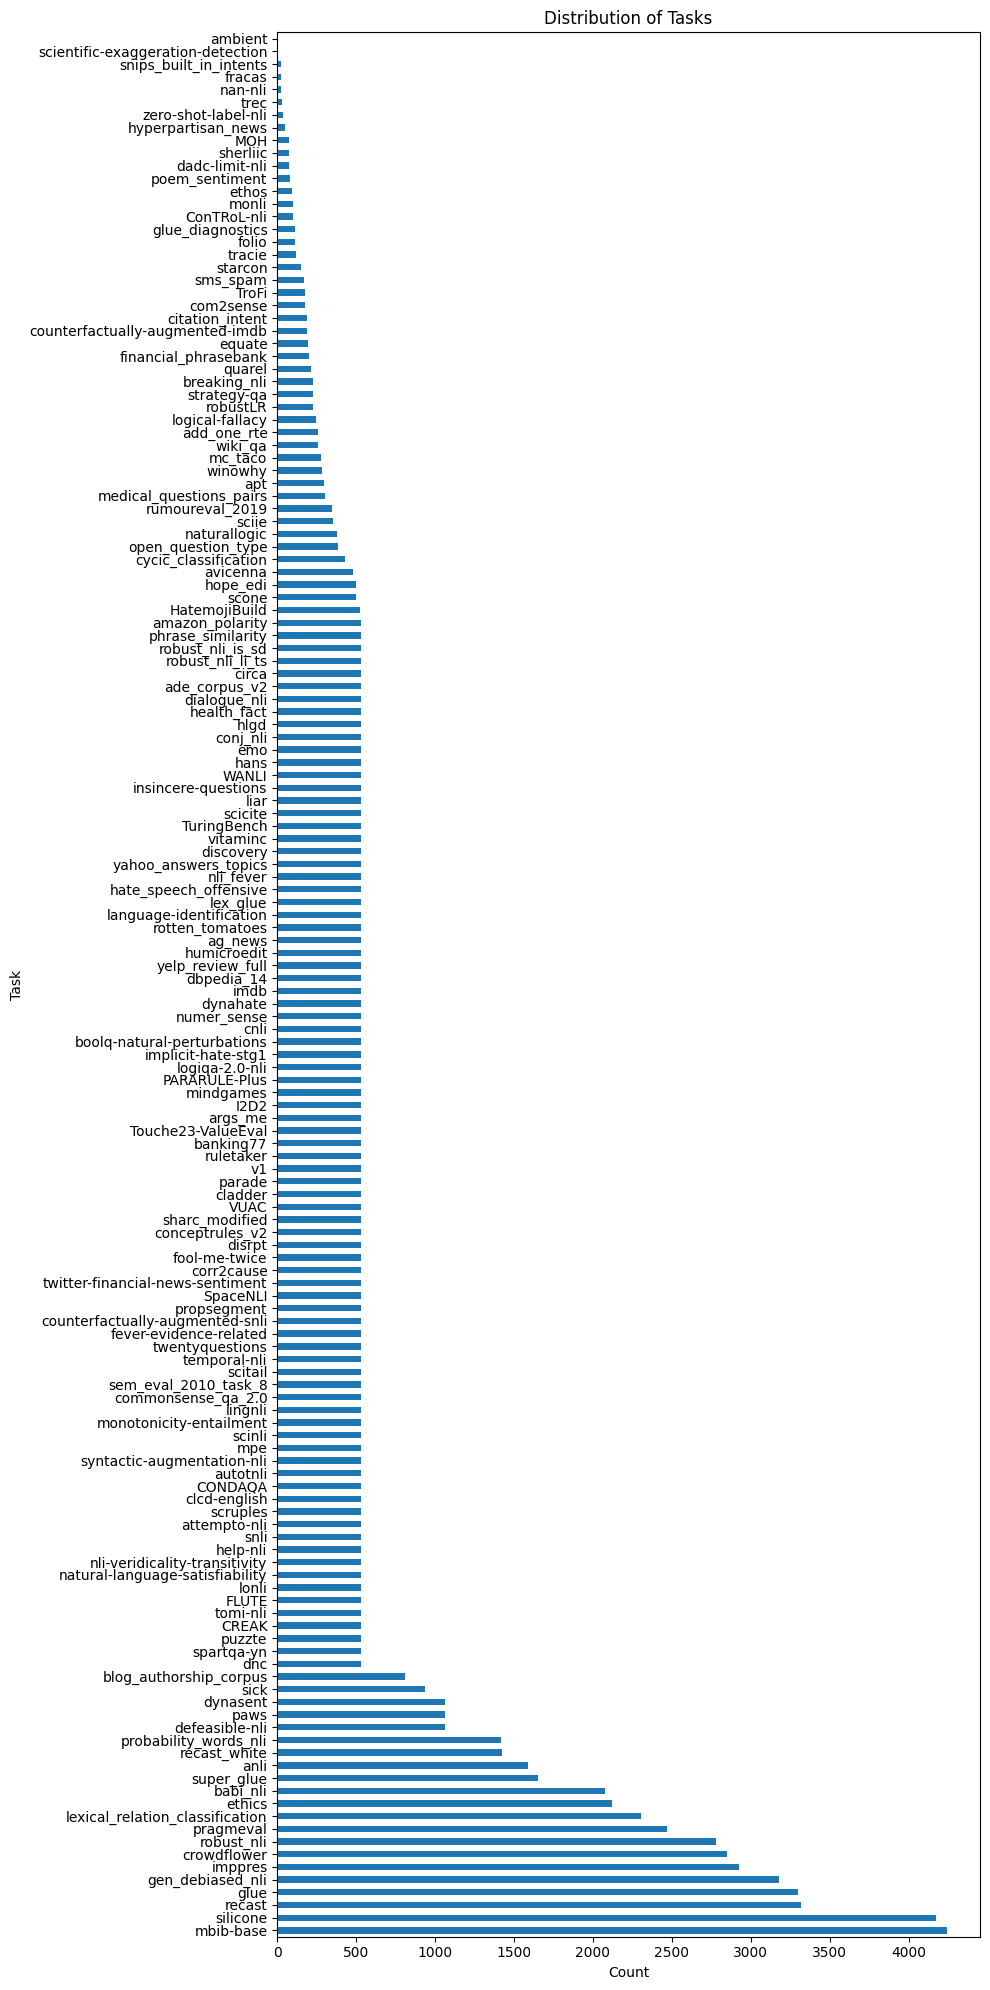

In [112]:
import matplotlib.pyplot as plt

# Extract the first word from each task in the "task" column
df_train['task_cleaned'] = df_train['task'].apply(lambda x: x.split("/")[0])

# Count the occurrences of each unique task
task_distribution = df_train['task_cleaned'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
task_distribution.plot(kind='barh')
plt.title('Distribution of Tasks')
plt.xlabel('Count')
plt.ylabel('Task')
plt.tight_layout()
plt.show()


In [113]:
# Sort the task distribution in descending order
sorted_task_distribution = task_distribution.sort_values(ascending=False)

# Print the tasks with their counts in descending order
for task, count in sorted_task_distribution.items():
    print(f"{task}: {count}")

mbib-base: 4240
silicone: 4176
recast: 3321
glue: 3296
gen_debiased_nli: 3180
imppres: 2925
crowdflower: 2850
robust_nli: 2777
pragmeval: 2466
lexical_relation_classification: 2307
ethics: 2120
babi_nli: 2077
super_glue: 1654
anli: 1590
recast_white: 1426
probability_words_nli: 1417
defeasible-nli: 1060
paws: 1060
dynasent: 1060
sick: 938
blog_authorship_corpus: 811
args_me: 530
imdb: 530
lex_glue: 530
language-identification: 530
rotten_tomatoes: 530
ag_news: 530
humicroedit: 530
yelp_review_full: 530
nli_fever: 530
dynahate: 530
I2D2: 530
numer_sense: 530
cnli: 530
boolq-natural-perturbations: 530
implicit-hate-stg1: 530
logiqa-2.0-nli: 530
PARARULE-Plus: 530
mindgames: 530
hate_speech_offensive: 530
emo: 530
yahoo_answers_topics: 530
hlgd: 530
amazon_polarity: 530
phrase_similarity: 530
robust_nli_is_sd: 530
robust_nli_li_ts: 530
circa: 530
ade_corpus_v2: 530
dialogue_nli: 530
health_fact: 530
conj_nli: 530
discovery: 530
banking77: 530
hans: 530
WANLI: 530
insincere-questions: 530


In [114]:
# Initialize an empty list to store unique tasks
unique_tasks = []

# Iterate over each row in the DataFrame
for task in df_train['task']:
    # Split the task by "/"
    split_task = task.split("/")
    # Take the first word if "/" exists, otherwise take the whole task
    task_name = split_task[0] if len(split_task) > 1 else task
    # Append the task to the unique_tasks list if not already present
    if task_name not in unique_tasks:
        unique_tasks.append(task_name)


In [115]:
unique_tasks

['glue',
 'super_glue',
 'anli',
 'babi_nli',
 'sick',
 'snli',
 'scitail',
 'hans',
 'WANLI',
 'recast',
 'probability_words_nli',
 'nan-nli',
 'nli_fever',
 'breaking_nli',
 'conj_nli',
 'fracas',
 'dialogue_nli',
 'mpe',
 'dnc',
 'recast_white',
 'robust_nli',
 'robust_nli_is_sd',
 'robust_nli_li_ts',
 'gen_debiased_nli',
 'add_one_rte',
 'imppres',
 'glue_diagnostics',
 'hlgd',
 'paws',
 'medical_questions_pairs',
 'insincere-questions',
 'TuringBench',
 'trec',
 'vitaminc',
 'hope_edi',
 'rumoureval_2019',
 'ethos',
 'discovery',
 'pragmeval',
 'silicone',
 'lex_glue',
 'language-identification',
 'imdb',
 'rotten_tomatoes',
 'ag_news',
 'yelp_review_full',
 'financial_phrasebank',
 'poem_sentiment',
 'dbpedia_14',
 'amazon_polarity',
 'sms_spam',
 'humicroedit',
 'snips_built_in_intents',
 'hate_speech_offensive',
 'yahoo_answers_topics',
 'hyperpartisan_news',
 'sciie',
 'citation_intent',
 'scicite',
 'liar',
 'lexical_relation_classification',
 'crowdflower',
 'ethics',
 'emo'